In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_May10_ntuple/*.root")

In [3]:
hists = {}
hists["Target_kaon_hist"] = hist.Hist("Target SP Kaons",
                                hist.Cat("Ktype", "Type of Kaons"),      
                                hist.Bin("k", r"Kaon Kinetic Energy [MeV]", 40, 0, 4000)
                            )


In [4]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon = ldmx_events['Target_Kaon']
    
    masks_id = {'Kshort': 310,
                'Klong': 130,
                'Kpm': 321,
               }
    masses = {'Kshort': 497.648,
              'Klong': 497.648,
              'Kpm': 493.677
             }
    
    def flat(x,axis=None):
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x
    
    for part,pmask in masks_id.items():
        part_mask = (abs(target_kaon.pdgID) == pmask)
        print(flat(target_kaon.e)-masses[part])
        hists["Target_kaon_hist"].fill(
                                     k=flat(target_kaon.e[part_mask]) - masses[part],
                                     Ktype= part
                                     )
   # print(part_mask)

In [5]:
nchunk = 0
for chunk in ldmx_dict:
    # I usually test my code in one chunck only
    #if nchunk >= 1: break
    print('process')
    nchunk += 1
    ProcessChunk(chunk, hists)

process
[1.46072778e+03 5.76148682e+01 5.44152893e+02 2.59445190e+00
 1.81602417e+03 6.60732727e+02 1.04663916e+03 4.55300415e+02
 6.49924377e+02 4.06028137e+02 7.89085632e+02 5.95727356e+02
 1.87344678e+03 2.44019287e+02 2.71401794e+02 2.74609192e+02
 1.03154834e+03 8.22400513e+01 1.44476758e+03 2.01556091e+02
 4.84319458e+01 1.88355347e+03 5.38280029e+01 5.95437622e+01
 1.38349060e+02 7.87475037e+02 6.15411987e+01 4.13150452e+02
 7.20382690e+00 4.29405029e+02 1.88681824e+02 3.27385010e+02
 1.18812012e+02 1.21499048e+03 6.66668274e+02 7.31158997e+02
 1.43136157e+03 6.55399963e+02 9.14939758e+02 6.40733643e+01
 3.30585938e+01 4.97701538e+02 1.33932983e+02 3.84950500e+02
 1.70272339e+02 8.59163208e+01 2.74674500e+02 1.27585083e+02
 3.81389954e+02 7.76294556e+01 7.03082092e+02 6.50823669e+02
 2.18991113e+03 1.03134937e+03 6.95474426e+02 6.75725403e+02
 1.84258362e+02 9.24993103e+02 1.43429150e+03 1.00986371e+03
 5.87070312e+01 6.75190735e+02 2.18014526e+01 7.21794617e+02
 2.53750488e+02 

process
[6.12204407e+02 8.17426575e+02 6.03830139e+02 9.58324768e+02
 2.71191724e+03 2.59249512e+02 2.90017151e+02 1.23069153e+02
 1.96048950e+03 3.93703369e+02 6.65699463e+01 7.26621643e+02
 7.75020752e+01 5.93485901e+02 5.36135437e+02 9.64175110e+02
 3.71573242e+02 1.51429492e+03 8.83060486e+02 5.67835876e+02
 8.25183777e+02 1.07338354e+03 2.52853760e+02 1.14141846e+03
 8.61289490e+02 1.20571704e+03 4.30883301e+02 7.02069092e+00
 4.02825806e+02 2.07684717e+03 1.60981177e+03 3.93434998e+02
 3.39879761e+02 5.61979675e+02 1.82645142e+02 7.52403870e+02
 2.16638916e+02 4.26516724e+01 1.06006152e+03 1.14047095e+03
 4.67848511e+02 4.70428467e+00 9.24330444e+01 6.22006653e+02
 4.27717957e+02 7.25985413e+02 3.09729431e+02 1.90117798e+02
 2.20547412e+03 1.10919507e+03 1.24879077e+03 4.03314270e+02
 9.84405518e-01 4.05914001e+02 7.83444641e+02 3.04485291e+02
 2.28175269e+03 1.45573657e+03 1.29530835e+03 6.01521057e+02
 7.32775940e+02 1.10675598e+02 2.20537537e+02 2.23822046e+03
 1.72071484e+03 

process
[ 4.12812195e+02  3.91859558e+02  8.85537720e+00  1.42029541e+02
  1.43236841e+03  5.76436462e+02  9.87509827e+02  5.43519714e+02
  1.91304321e+01  9.61657715e+00  1.31008118e+02  7.91551514e+01
  2.67582031e+03  2.44737854e+02  2.56785205e+03  2.31362915e+00
  9.22078186e+02  3.20092407e+02  7.55859375e+01  6.84759521e+01
  1.54895459e+03  1.61300806e+03  1.83815039e+03  1.40786548e+03
  3.90789551e+02  2.27070776e+03  5.55866699e+01  9.32030823e+02
  1.24766650e+03  1.59298779e+03  1.22326050e+01  1.89169873e+03
  7.53404541e+01  1.07249976e+03  1.13875488e+03  2.06969287e+03
  1.13208435e+02  2.26481750e+02  6.47981140e+02  6.54715515e+02
  1.83340332e+02  7.13385681e+02  2.19859009e+01  5.58329529e+02
  5.14745850e+02  9.53146301e+02  3.70942627e+02  9.57078308e+02
  7.85020935e+02  7.20291199e+02  6.45251770e+02  8.25956238e+02
  3.81066895e+00  1.10896924e+03  2.44056396e+02  6.07947327e+02
  4.02864441e+02  8.54813293e+02  1.51865649e+03  1.40614380e+02
  1.58118164e+03 

process
[ 4.12812195e+02  3.91859558e+02  8.85537720e+00  1.42029541e+02
  1.43236841e+03  5.76436462e+02  9.87509827e+02  5.43519714e+02
  1.91304321e+01  9.61657715e+00  1.31008118e+02  7.91551514e+01
  2.67582031e+03  2.44737854e+02  2.56785205e+03  2.31362915e+00
  9.22078186e+02  3.20092407e+02  7.55859375e+01  6.84759521e+01
  1.54895459e+03  1.61300806e+03  1.83815039e+03  1.40786548e+03
  3.90789551e+02  2.27070776e+03  5.55866699e+01  9.32030823e+02
  1.24766650e+03  1.59298779e+03  1.22326050e+01  1.89169873e+03
  7.53404541e+01  1.07249976e+03  1.13875488e+03  2.06969287e+03
  1.13208435e+02  2.26481750e+02  6.47981140e+02  6.54715515e+02
  1.83340332e+02  7.13385681e+02  2.19859009e+01  5.58329529e+02
  5.14745850e+02  9.53146301e+02  3.70942627e+02  9.57078308e+02
  7.85020935e+02  7.20291199e+02  6.45251770e+02  8.25956238e+02
  3.81066895e+00  1.10896924e+03  2.44056396e+02  6.07947327e+02
  4.02864441e+02  8.54813293e+02  1.51865649e+03  1.40614380e+02
  1.58118164e+03 

process
[7.69775574e+02 1.65356323e+02 5.31186340e+02 8.54303406e+02
 2.52138550e+02 3.10656311e+02 1.73483398e+02 7.80784851e+02
 9.42630676e+02 2.88364197e+02 2.13511902e+02 7.65317810e+02
 3.62382080e+02 7.60638123e+02 1.74019653e+02 5.75362122e+02
 1.16865784e+02 2.67652832e+02 3.96183655e+02 2.76801758e+02
 1.45985596e+03 8.33204651e+02 1.22363281e+03 4.67814209e+02
 1.51747827e+03 2.51813843e+02 6.46284851e+02 2.68181519e+02
 2.43744019e+02 1.70883179e+02 9.72730652e+02 1.11441040e+02
 5.22673401e+02 4.32483521e+01 1.37656543e+03 1.54673828e+02
 3.40787109e+02 3.23661255e+02 5.72725403e+02 3.28790161e+02
 1.33103394e+03 2.90579102e+02 3.22972900e+02 9.94495667e+02
 5.51560120e+02 1.25547925e+03 2.98831970e+02 1.31969604e+01
 1.71372705e+03 2.39215698e+01 1.52977710e+03 9.23013611e+02
 5.93254578e+02 2.01842676e+03 4.45520691e+02 2.22795471e+02
 5.33470154e+02 6.80307190e+02 6.41698425e+02 9.44426086e+02
 2.34882507e+02 6.39580627e+02 9.70145813e+02 2.14195190e+02
 1.37259521e+02 

process
[1.75459229e+02 7.05057068e+02 7.74403870e+02 1.51192212e+03
 1.40846985e+02 8.08190002e+02 1.86643457e+03 1.19643018e+03
 5.68325195e+01 5.33093689e+02 8.99019348e+02 2.15355286e+02
 1.06913477e+03 2.75661597e+03 2.07878711e+03 3.25430298e+00
 6.64808044e+02 1.02126770e+01 5.61097961e+02 2.06333984e+02
 1.80153564e+03 4.07444214e+02 9.19500732e+01 4.42992798e+02
 2.31249390e+02 1.10976440e+03 1.41796326e+02 8.36703430e+02
 2.79605713e+01 2.98544800e+02 1.95032959e+01 7.97024231e+02
 4.57476074e+02 4.80776184e+02 1.57897034e+02 1.41025635e+02
 2.79625549e+02 3.37743530e+02 2.44932104e+03 9.31342957e+02
 4.96779846e+02 1.32627075e+02 2.67630432e+02 1.43293213e+02
 3.03378723e+02 2.78824524e+02 2.30063818e+03 8.21524597e+02
 8.86331360e+02 4.91519226e+02 1.00354004e+02 6.03307495e+01
 2.48676025e+02 2.56422119e+02 1.73769226e+02 3.93614929e+02
 6.56337891e+01 2.12820312e+03 9.82498779e+01 2.52870166e+03
 1.23056274e+03 7.66570740e+02 6.71167419e+02 9.23034119e+02
 3.40891602e+02 

process
[1.06217041e+01 1.82579663e+03 1.95214526e+03 7.99748596e+02
 1.25310913e+02 6.15491943e+01 1.26410095e+02 1.03488574e+03
 2.63160547e+03 1.86000122e+02 6.39017334e+01 2.49832458e+02
 1.35080322e+02 2.87229004e+01 8.38774841e+02 9.88134766e+01
 1.95762915e+03 1.31667847e+02 2.66684753e+02 7.59384827e+02
 1.60361877e+02 5.07530701e+02 1.20520898e+03 4.10657349e+02
 2.44029907e+02 8.06847595e+02 6.28296509e+01 6.66687622e+01
 2.64238159e+03 6.59969666e+02 2.10367981e+02 6.75954895e+02
 2.45067200e+02 1.20095215e+02 9.72595215e+01 3.33101746e+02
 1.10707300e+03 5.20653076e+01 8.02723328e+02 7.99987793e+01
 1.00543781e+03 3.56515015e+02 8.28741150e+02 7.44412659e+02
 9.67941711e+02 1.00360748e+03 2.09563599e+02 5.29012634e+02
 2.78708130e+02 4.81157227e+01 2.65093994e+00 7.46271667e+02
 1.50557544e+03 6.23855530e+02 5.79173401e+02 3.04789307e+02
 4.76006714e+02 3.35992798e+02 1.13308203e+03 2.99688293e+02
 1.56210181e+03 7.02014832e+02 5.19645386e+01 3.82986755e+02
 4.05208252e+02 

process
[2.78834961e+03 6.63657654e+02 4.03072876e+02 3.72019165e+02
 3.62368042e+02 4.99402466e+01 1.79592529e+03 1.86049976e+03
 7.24483582e+02 9.27014221e+02 2.34920898e+02 3.68997620e+02
 3.43606689e+02 1.65352844e+02 1.04128052e+02 6.34495850e+01
 8.50772400e+02 7.31192627e+01 2.75505981e+02 1.13709814e+03
 5.82485901e+02 4.78448669e+02 2.86528015e+02 1.14620361e+02
 4.42766113e+02 5.89665527e+01 1.94531860e+03 1.59346167e+03
 3.64498047e+02 2.90219727e+01 4.40487671e+02 8.13205627e+02
 3.74399048e+02 9.66001282e+02 7.58554688e+01 6.24578430e+02
 8.74218689e+02 2.86314331e+02 1.05685242e+02 7.83883728e+02
 2.10176453e+02 5.36465759e+02 3.74121216e+02 1.92825317e+01
 1.90118848e+03 3.49263184e+02 3.90376038e+02 9.47115173e+02
 4.84616272e+02 1.86949829e+02 7.18477112e+02 3.96076660e+02
 2.06454199e+03 6.99268799e+01 8.85840027e+02 5.67124573e+02
 5.92359070e+02 6.72616394e+02 1.35804688e+03 1.06818286e+03
 7.99191345e+02 6.30584167e+02 8.08361633e+02 2.46752466e+03
 1.15939758e+02 

process
[1.93409741e+03 1.93220459e+02 4.29222839e+02 7.85312500e+01
 1.48686401e+02 2.83989136e+02 1.73012842e+03 3.72561523e+02
 1.36021851e+03 5.52747742e+02 7.14928162e+02 3.29770752e+02
 1.08391309e+03 5.68065125e+02 1.47397095e+03 4.50515564e+02
 1.50671973e+03 4.26198730e+01 5.21591125e+02 1.98393066e+02
 4.53483398e+02 4.41339844e+02 5.13098328e+02 1.27411194e+02
 1.82099121e+02 1.70691064e+03 1.18557251e+02 3.93023682e+00
 4.37365723e+02 7.07975769e+02 1.88627417e+03 5.83303833e+01
 4.51174500e+02 2.64370667e+02 4.11961731e+02 3.13987671e+02
 6.86458679e+02 5.73164062e+01 7.45859558e+02 8.51989136e+01
 3.56882019e+02 2.88492249e+02 8.80239685e+02 2.47152161e+02
 1.18276245e+02 1.37658508e+02 4.79513550e+02 6.42510681e+02
 9.05928650e+02 4.68315247e+02 9.88079834e+01 1.05581323e+03
 1.35874609e+03 2.65809204e+02 1.40369531e+03 5.04574097e+02
 2.24831787e+02 6.67272949e+01 2.32713928e+02 5.59194763e+02
 1.30290845e+03 1.78105225e+02 1.27660522e+03 1.48272705e+00
 1.21806213e+02 

process
[1.68894678e+03 1.14610449e+03 5.69671570e+02 5.72826721e+02
 5.80945251e+02 2.89881592e+02 4.08325806e+02 2.93852905e+02
 2.19405811e+03 5.61806213e+02 1.54730371e+03 5.25906616e+02
 1.54226123e+03 9.66439819e+00 1.85841064e+02 2.50893494e+02
 3.00335754e+02 9.86145691e+02 6.20013977e+02 1.51764343e+02
 2.45342773e+03 1.27214795e+03 4.10079590e+02 2.14865649e+03
 9.13777649e+02 7.14046448e+02 2.33224548e+02 5.89548279e+02
 5.27971375e+02 6.35253479e+02 7.93885071e+02 2.41583313e+02
 1.95301697e+02 2.68119202e+02 8.30855408e+02 1.07079224e+02
 5.55447571e+02 1.01578876e+03 8.44205261e+02 1.32849683e+03
 4.05148376e+02 2.22322388e+02 5.86417236e+01 3.74001831e+02
 2.49025903e+03 6.66292053e+02 4.27404785e+02 1.00048627e+03
 1.40286938e+03 1.23188782e+02 2.99516602e+02 2.36594238e+02
 2.03372876e+03 6.41565857e+02 2.96396362e+02 8.29514954e+02
 7.98358337e+02 1.75042969e+02 7.25833557e+02 7.62486389e+02
 7.18914368e+02 8.94975586e+01 2.17663770e+03 8.86471863e+02
 2.46244690e+02 

<Hist (Ktype,k) instance at 0x107a30cd0>


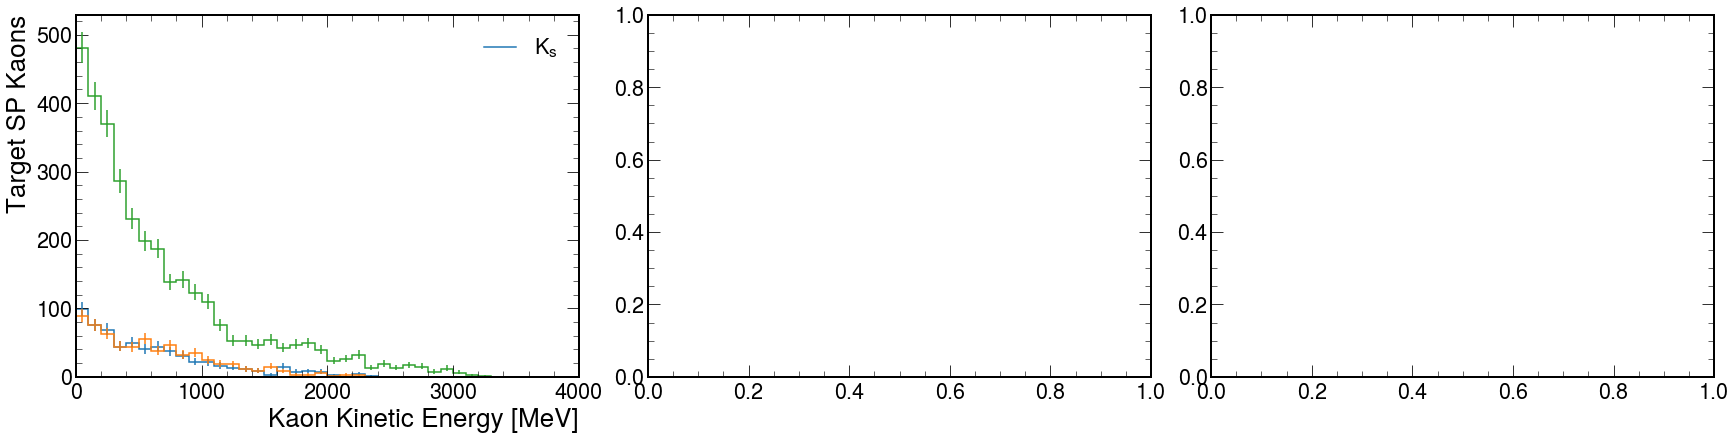

In [8]:
print(hists["Target_kaon_hist"])
fig, ax = plt.subplots()
hist.plot1d(hists["Target_kaon_hist"],ax=ax,clear=False);
leg = ax.legend([r'$K_s$'])